In [ ]:
# Libraries
import pandas as pd
import seaborn as sb
sb.set_theme()
import re
import os
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Reading the business json file
business = pd.read_json(path_or_buf="/content/drive/MyDrive/Colab Notebooks/yelp_academic_dataset_business.json", lines=True)

In [ ]:
states_pd = business["state"]

state_set = set()
state_count = Counter()
for state in states_pd:
  state_set.add(state)
  l = [state]
  state_count.update(l)

print(state_count)
print("Total number of unique states : ", len(state_set))

Counter({'PA': 34039, 'FL': 26330, 'TN': 12056, 'IN': 11247, 'MO': 10913, 'LA': 9924, 'AZ': 9912, 'NJ': 8536, 'NV': 7715, 'AB': 5573, 'CA': 5203, 'ID': 4467, 'DE': 2265, 'IL': 2145, 'TX': 4, 'CO': 3, 'WA': 2, 'HI': 2, 'MA': 2, 'NC': 1, 'UT': 1, 'MT': 1, 'MI': 1, 'SD': 1, 'XMS': 1, 'VI': 1, 'VT': 1})
Total number of unique states :  27


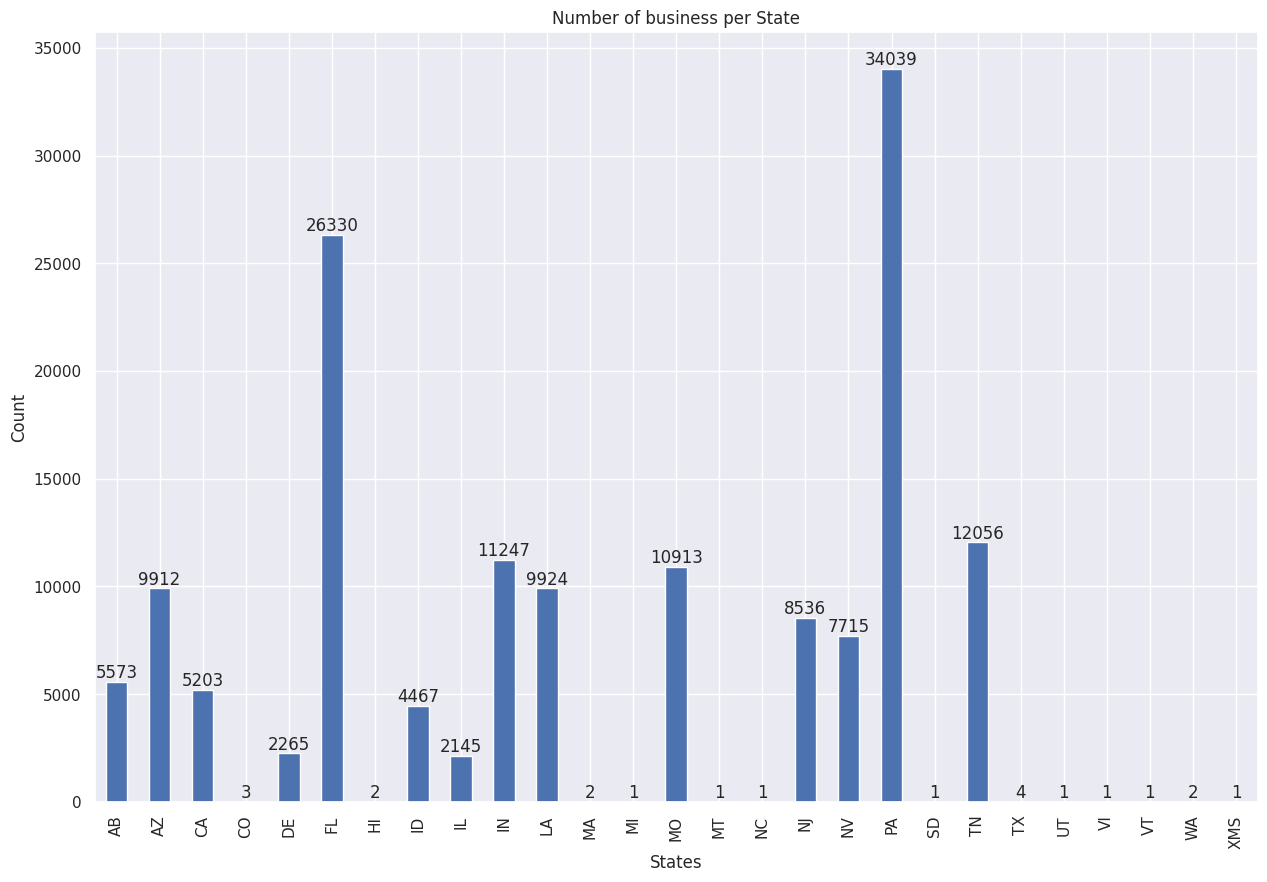

In [ ]:
# Plotting the number of business per state

states_count = business.groupby("state")["state"].count()

ax = states_count.plot(kind="bar", stacked = False)

for container in ax.containers:
  ax.bar_label(container)

plt.gcf().set_size_inches(15, 10)
plt.xlabel("States")
plt.ylabel("Count")
plt.title("Number of business per State")
plt.show()

## Analysis

Based on the bar plot, we can see that `PA` has the highest number of businesses with a total number of `34039` and `26289` open, followed by `FA` with a total number of `26330` businesses and `21540` open.

`CO`, `HI`, `MA`, `MI`, `MT`, `NC`, `SD`, `TX`, `UT`, `VI`, `VT`, `WA`, `XMS` are states with low businesses of less than 5.

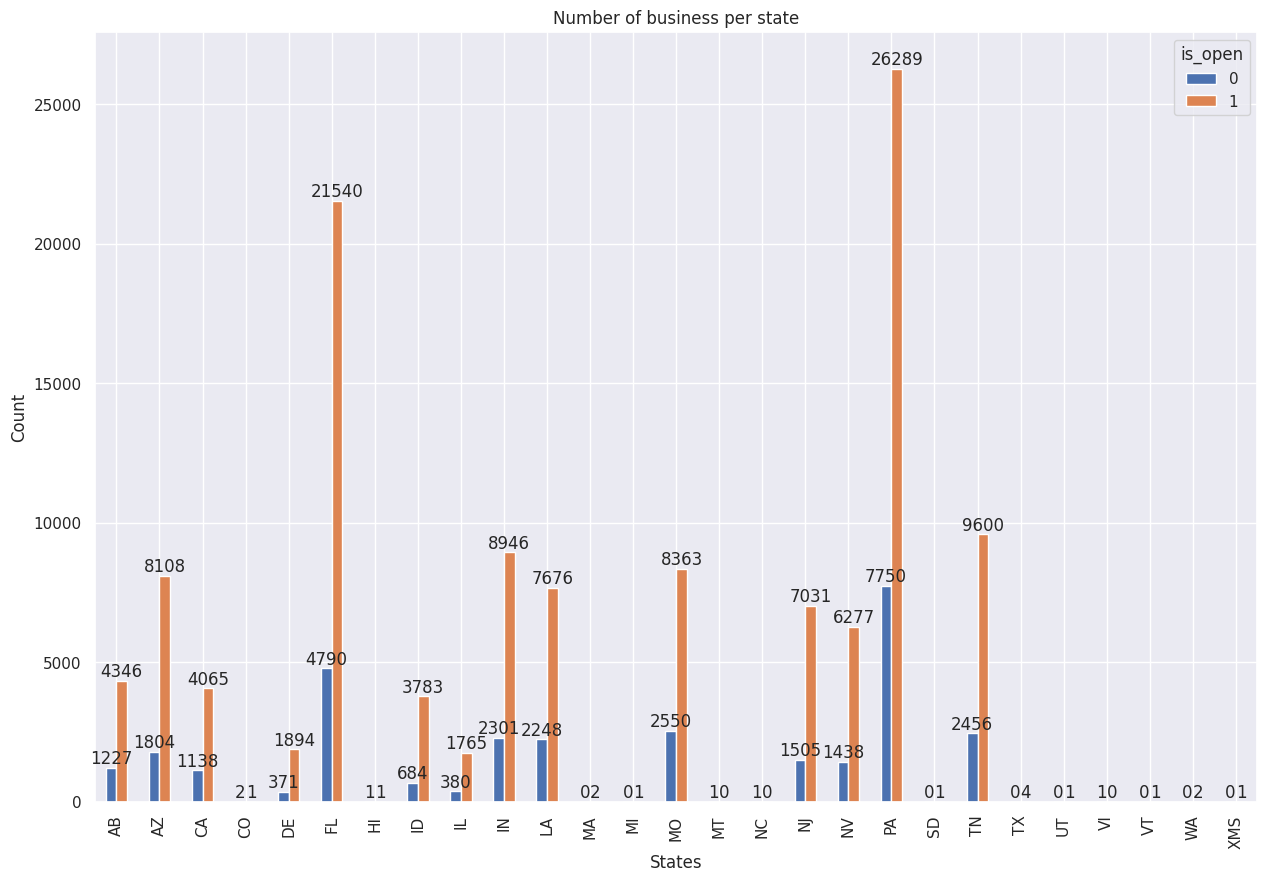

In [ ]:
# Plotting the number of open/closed business per state

state_count = business.groupby(['state', 'is_open'])['state'].count().unstack(fill_value=0)
ax = state_count.plot(kind="bar", stacked = False)

for container in ax.containers:
  ax.bar_label(container)

plt.gcf().set_size_inches(15, 10)
plt.xlabel("States")
plt.ylabel("Count")
plt.title("Number of open/closed business per state")
plt.show()